In [2]:
import numpy as np
import pandas as pd

In [21]:
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'size': [10, 15, 18, 25, 30, 32, 35, 40, 22, 35, 23],
    'color': ['Red', 'Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Green', 'Green', 'Red'],
    'Target':   [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
})
df = data

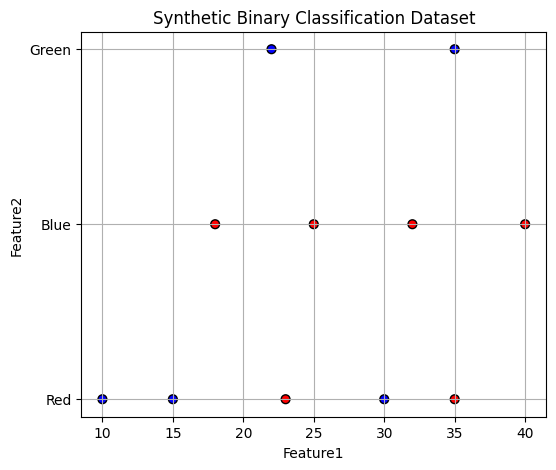

In [22]:
plt.figure(figsize=(6, 5))
plt.scatter(df['size'], df['color'], c=df['Target'], cmap='bwr', edgecolor='k', s=40)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Synthetic Binary Classification Dataset")
plt.grid(True)
plt.show()

In [23]:
df.columns

Index(['size', 'color', 'Target'], dtype='object')

In [24]:
len(df)

11

In [44]:
df['size'][0].dtype == 'int64'

True

In [49]:
type(sorted(df['size']))

list

In [57]:
len(df[(df['color'] == 'Blue') & (df['Target'] == 1)])


4

In [68]:
import numpy as np

def cross_entropy_catg(df, column, value, included=True):
    if included:
        post_cnt = len(df[(df[column] == value) & (df['Target'] == 1)])
        negt_cnt = len(df[(df[column] == value) & (df['Target'] == 0)])
    else:
        post_cnt = len(df[df['Target'] == 1]) - len(df[(df[column] == value) & (df['Target'] == 1)])
        negt_cnt = len(df[df['Target'] == 0]) - len(df[(df[column] == value) & (df['Target'] == 0)])
    
    total = post_cnt + negt_cnt

    if total == 0:
        return 0

    entropy = 0
    if post_cnt > 0:
        entropy -= (post_cnt / total) * np.log2(post_cnt / total)
    if negt_cnt > 0:
        entropy -= (negt_cnt / total) * np.log2(negt_cnt / total)

    return entropy

In [69]:
import numpy as np

def cross_entropy_num(df, column, value, included=True):
    if included:
        subset = df[df[column] < value]
    else:
        subset = df[df[column] >= value]

    post_cnt = len(subset[subset['Target'] == 1])
    negt_cnt = len(subset[subset['Target'] == 0])
    total = post_cnt + negt_cnt

    if total == 0:
        return 0  # no samples to evaluate

    entropy = 0
    if post_cnt > 0:
        entropy -= (post_cnt / total) * np.log2(post_cnt / total)
    if negt_cnt > 0:
        entropy -= (negt_cnt / total) * np.log2(negt_cnt / total)

    return entropy


In [70]:
cross_entropy_catg(df, 'color', 'Red', True)

np.float64(0.9709505944546686)

In [73]:
cross_entropy_num(df, 'size', 20, True)

np.float64(0.9182958340544896)

In [ ]:
def best_threshold_to_split(df, column):
    if type(df[column][0]) == str:
        split_node = list(df[column].unique())
    else:
        sorted_attr = sorted(df[column])
        split_node = []
        for i in range(len(df)-1):
            split_node.append((sorted_attr[i] + sorted_attr[i+1])/2)
    # print(split_node)

    information_gain = []

    for criteria in split_node:
        "make a subsest of the dataframe for particular criteria of the column"


In [52]:
columns = df.columns

In [53]:
for column in columns:
    best_threshold_to_split(df, column)

[12.5, 16.5, 20.0, 22.5, 24.0, 27.5, 31.0, 33.5, 35.0, 37.5]
['Red', 'Blue', 'Green']
[0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]
